# Работа с гипотезами, A/B - тест и анализ его результатов

<b> Проект: </b>
* Для одного крупного интернет-магазина требуется приоритизировать гипотезы и провести A/B-тест для увеличения выручки.
      
<b> Предоставленные данные: </b>
* Данные для первой части - Файл hypothesis.csv.
    * Hypothesis — краткое описание гипотезы;
    * Reach — охват пользователей по 10-балльной шкале;
    * Impact — влияние на пользователей по 10-балльной шкале;
    * Confidence — уверенность в гипотезе по 10-балльной шкале;
    * Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
* Данные для второй части - Файл orders.csv.
    * transactionId — идентификатор заказа;
    * visitorId — идентификатор пользователя, совершившего заказ;
    * date — дата, когда был совершён заказ;
    * revenue — выручка заказа;
    * group — группа A/B-теста, в которую попал заказ.
* Файл с количеством пользователей в указанную дату в указанной группе A/B-теста - visitors.csv.
    * date — дата;
    * group — группа A/B-теста;

<b> Задачи исследования: </b>
- Приоритизация гипотез;
- Анализ результатов теста.

In [33]:
import pandas as pd
import numpy as np
import datetime as dt
import scipy.stats as stats
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

## Приоритизация гипотез

In [34]:
hypothesis = pd.read_csv('/Users/vintera/Git/projects/my_projects/dataset/project_07/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [35]:
pd.options.display.max_colwidth = 150

In [36]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


In [37]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Вывод
Применив фреймворки "ICE" и "RICE" для оценки приоритета гипотез, мы получили две таблицы с рейтингами, отсортированными по убыванию. Приоритетность гипотез отличается, так как второй метод оценки включает в себя показатель "Reach" - степень охвата пользователей, которых затронет нововведение. Скидка на товар в день рождения возможно и увеличит продажи, однако контрольная группа для проведения эксперимента будет ничтожно малой, что затруднит проведение А/В-теста. Что касается лидера фреймворка "RICE", то можно сказать, что главной составляющей успеха этой гипотезы является охват всех пользователей интернет-магазина.  

## Анализ A/B-теста

### Загрузка данных и изучение общей информации

In [38]:
orders = pd.read_csv('/Users/vintera/Git/projects/my-projects/dataset/project_07/orders.csv')
visitors = pd.read_csv('/Users/vintera/Git/projects/my-projects/dataset/project_07/visitors.csv')

In [39]:
orders.sample(5)
orders.info()

,transactionId,visitorId,date,revenue,group
314,738849391,3161387566,2019-08-24,830,A
232,2883105032,3086835579,2019-08-23,2646,A
1071,3348489190,3112126740,2019-08-12,7690,A
928,2894657060,204675465,2019-08-30,33050,B
411,1696190144,1687240555,2019-08-06,24744,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [40]:
visitors.sample(5)
visitors.info()

,date,group,visitors
8,2019-08-09,A,617
32,2019-08-02,B,581
51,2019-08-21,B,656
43,2019-08-13,B,769
20,2019-08-21,A,646


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


### Предобработка и исследование данных

In [41]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

#### Вывод

Данные результатов теста, содержащие информацию о заказах и посетителях прочитаны, осмотрены, формат даты в них исправлен. Другими словами, данные готовы для работы с ними.

### Исследовательский анализ данных (EDA)

#### Кумулятивная выручка по группам

In [42]:
# Создадим таблицу, содержащую уникальные даты проведения теста для каждой из групп
datesGroups = orders[['date', 'group']].drop_duplicates()

# Используя полученную таблицу получим агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
        'date' : 'max',
        'group' : 'max',
        'transactionId' : pd.Series.nunique,
        'visitorId' : pd.Series.nunique,
        'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# А также агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
        'date' : 'max',
        'group' : 'max',
        'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# Объединим таблицы, переименуем столбцы и добавим новые
cumulativeData = pd.merge(ordersAggregated, visitorsAggregated, on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeData['avgCheck'] = cumulativeData['revenue'] / cumulativeData['orders']

# Разделим данные по группам
cumulativeDataA = cumulativeData.query('group == "A"')
cumulativeDataB = cumulativeData.query('group == "B"')

cumulativeData.head(5)
cumulativeDataA.head(5)
cumulativeDataB.head(5)

,date,group,orders,buyers,revenue,visitors,conversion,avgCheck
0,2019-08-01,A,24,20,148579,719,0.033380,6190.791667
1,2019-08-01,B,21,20,101217,713,0.029453,4819.857143
2,2019-08-02,A,44,38,242401,1338,0.032885,5509.113636
3,2019-08-02,B,45,43,266748,1294,0.034776,5927.733333
4,2019-08-03,A,68,62,354874,1845,0.036856,5218.735294


,date,group,orders,buyers,revenue,visitors,conversion,avgCheck
0,2019-08-01,A,24,20,148579,719,0.033380,6190.791667
2,2019-08-02,A,44,38,242401,1338,0.032885,5509.113636
4,2019-08-03,A,68,62,354874,1845,0.036856,5218.735294
6,2019-08-04,A,84,77,425699,2562,0.032787,5067.845238
8,2019-08-05,A,109,100,549917,3318,0.032851,5045.110092


,date,group,orders,buyers,revenue,visitors,conversion,avgCheck
1,2019-08-01,B,21,20,101217,713,0.029453,4819.857143
3,2019-08-02,B,45,43,266748,1294,0.034776,5927.733333
5,2019-08-03,B,61,59,380996,1803,0.033833,6245.836066
7,2019-08-04,B,78,75,489567,2573,0.030315,6276.500000
9,2019-08-05,B,101,98,581995,3280,0.030793,5762.326733


Text(0.5, 0, 'Дата эксперимента')

Text(0, 0.5, 'Кумулятивная выручка')

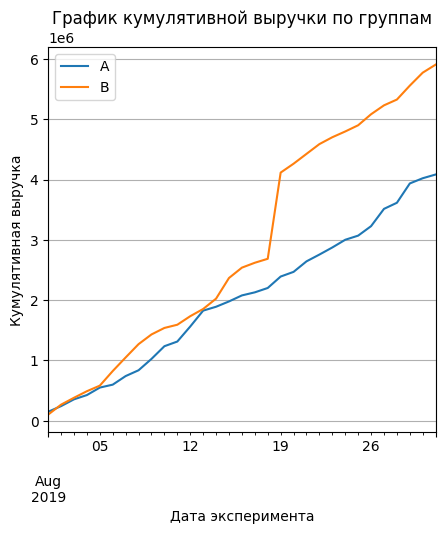

In [43]:
# Построим график кумулятивной выручки по группам
pltA = cumulativeDataA.plot(
    x='date', y='revenue', style='-', label='A')

pltAB = cumulativeDataB.plot(
    x='date', y='revenue', style='-', label='B', ax=pltA, figsize=(5, 5), grid=True, 
    title='График кумулятивной выручки по группам')
plt.xlabel('Дата эксперимента')
plt.ylabel('Кумулятивная выручка')

##### Вывод
Исходя из графика, можно сказать, что до 18 августа кумулятивная сумма выручки у групп была относительно равной, после чего показатели группы В начали значительно превосходить показатели группы А. Анализируя увиденное на графике, можно предположить, что 19.08.19 у покупателей группы В был всплеск покупательской активности или ими была совершена одна или несколько аномально дорогих покупок на общую сумму около 1.5 млн.

#### Кумулятивный средний чек по группам

Text(0.5, 0, 'Дата эксперимента')

Text(0, 0.5, 'Сумма среднего чека')

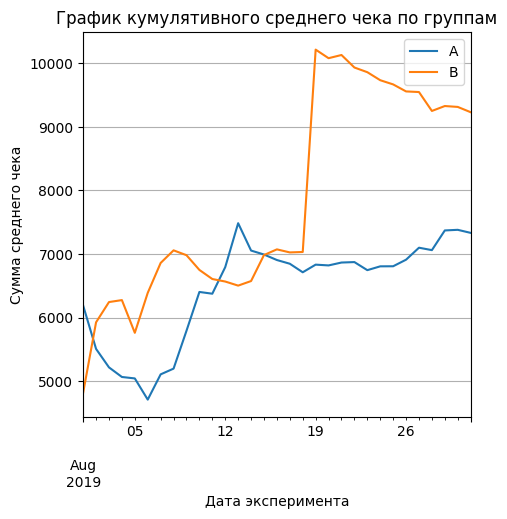

In [44]:
# Построим график кумулятивного среднего чека по группам
pltA = cumulativeDataA.plot(
    x='date', y='avgCheck', style='-', label='A')

pltAB = cumulativeDataB.plot(
    x='date', y='avgCheck', style='-', label='B', ax=pltA, figsize=(5, 5), grid=True, 
    title='График кумулятивного среднего чека по группам')
plt.xlabel('Дата эксперимента')
plt.ylabel('Сумма среднего чека')

##### Вывод
Как и следовало ожидать, средний чек группы В совершает скачок в тот же период времени, что и в графике выручки и к завершению теста превышает средний чек группы А в среднем на 2000.

#### Относительное изменение кумулятивного среднего чека группы B к группе A

<AxesSubplot: title={'center': 'График относительного изменения кумулятивного среднего чека группы B к группе A'}, xlabel='date'>

Text(0.5, 0, 'Дата эксперимента')

Text(0, 0.5, 'Относительное изменение')

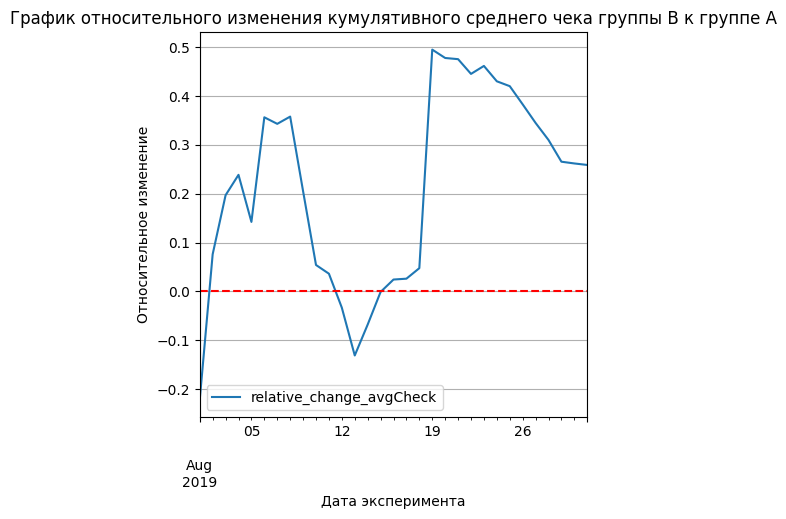

In [45]:
# Объеденним кумулятивные данные групп
mergedAB = cumulativeDataA.merge(cumulativeDataB, on='date', how='left', suffixes=['A', 'B'])

# Посчитаем относительное изменение суммы среднего чека группы В к группе А
mergedAB['relative_change_avgCheck'] = (mergedAB['avgCheckB']/(mergedAB['avgCheckA'])-1)

# Построим график
mergedAB.plot(
    x='date', y='relative_change_avgCheck', style='-', figsize=(5, 5), grid=True, 
    title='График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата эксперимента')
plt.ylabel('Относительное изменение')
plt.axhline(y=0, color='red', linestyle='--')

##### Вывод
На графике видны всплески показателей среднего чека группы В по отношению к показателям группы А, что может говорить о наличии аномальных значений в имеющихся данных.

#### Кумулятивная конверсия по группам

(0.0, 0.07)

Text(0.5, 0, 'Дата эксперимента')

Text(0, 0.5, 'Процент конверсии')

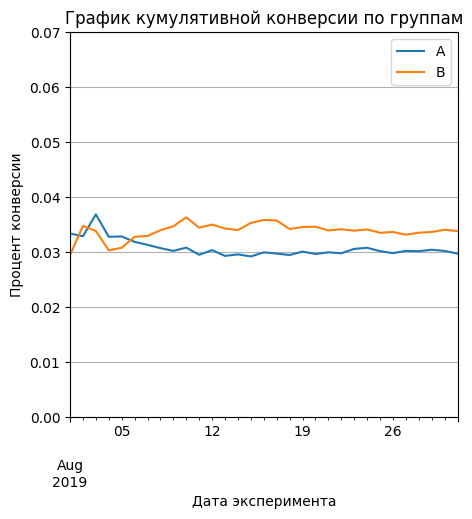

In [46]:
# Построим график кумулятивной конверсии по группам
pltA = cumulativeDataA.plot(
    x='date', y='conversion', style='-', label='A')

pltAB = cumulativeDataB.plot(
    x='date', y='conversion', style='-', label='B', ax=pltA, figsize=(5, 5), grid=True, 
    title='График кумулятивной конверсии по группам')
plt.ylim(0, 0.07)
plt.xlabel('Дата эксперимента')
plt.ylabel('Процент конверсии')

##### Вывод
Приблизительно до 06.08 показатели конверсий групп распределяются пропорционально друг другу, после чего, вплоть до 10.08 конверсия группы В повышается, а группы А идет на спад. После 10.08 показатели групп фиксируются и распределяются на графике паралельно друг к другу.

#### Относительное изменение кумулятивной конверсии группы B к группе A

<AxesSubplot: title={'center': 'График относительного изменения кумулятивной конверсии группы B к группе A'}, xlabel='date'>

Text(0.5, 0, 'Дата эксперимента')

Text(0, 0.5, 'Относительное изменение')

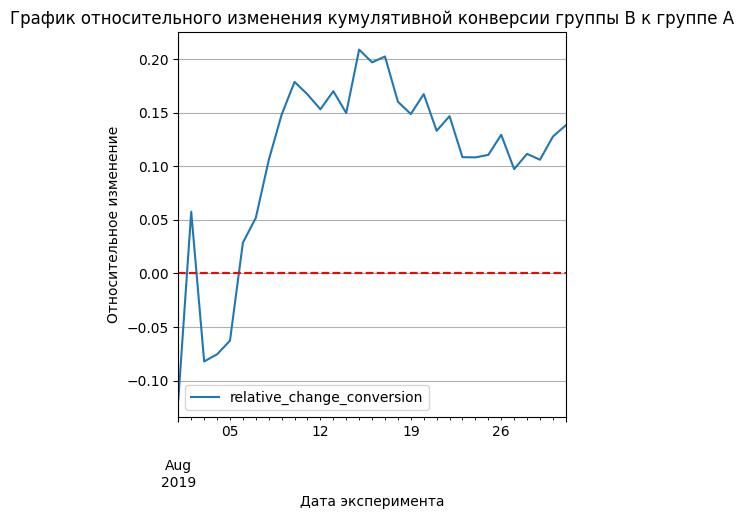

In [47]:
# Посчитаем относительное изменение конверсии группы В к группе А
mergedAB['relative_change_conversion'] = (mergedAB['conversionB']/(mergedAB['conversionA'])-1)

# Построим график
mergedAB.plot(
    x='date', y='relative_change_conversion', style='-', figsize=(5, 5), grid=True, 
    title='График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата эксперимента')
plt.ylabel('Относительное изменение')
plt.axhline(y=0, color='red', linestyle='--')

##### Вывод
Если до 06.08 показатели группы В колебались по отношению к группе А (сперва были выше, затем ниже), то после этой даты они подскачили и зафиксировались на высокой отметке.

#### Количество заказов по пользователям

<AxesSubplot: title={'center': 'График количества заказов по пользователям'}, xlabel='id', ylabel='orders'>

Text(0.5, 0, 'Пользователи')

Text(0, 0.5, 'Количество заказов')

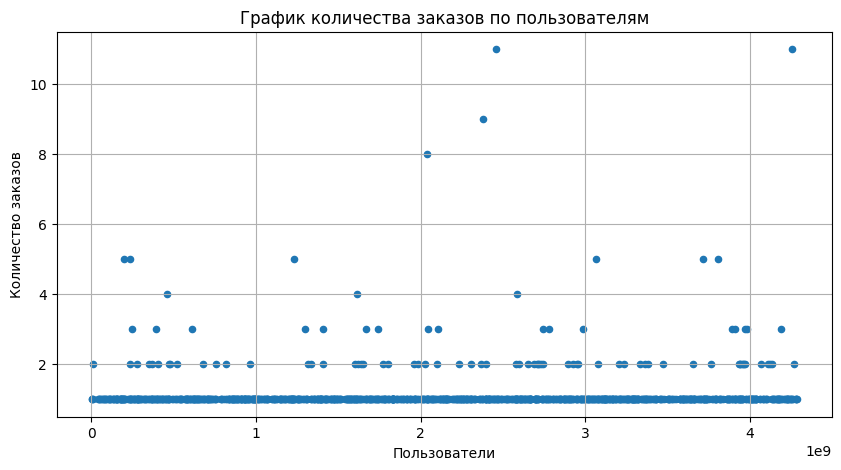

In [48]:
# Сгруппируем данные о заказах, чтобы получить данные о количестве заказов на одного пользователя
number_of_orders = orders.groupby('visitorId').agg({'transactionId' : 'count'}).reset_index()
number_of_orders.columns = ['id', 'orders']

# Построим точечный график
number_of_orders.plot(x='id', y='orders', 
                    kind='scatter', 
                    grid=True, 
                    figsize=(10,5), 
                    title='График количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')

##### Вывод
Клиентов, оформивших более двух заказов можно по пальцам сосчитать. В основном клиенты оформляли один заказ за исследуемый период.

#### Перцентили количества заказов на пользователя

In [49]:
orders_percentile = np.percentile(number_of_orders['orders'], [95, 99]) 
print('Всего клиентов совершивших заказы: {}'.format(len(number_of_orders)))
print()
print('95-й перцентиль: {:.0f} заказа'.format(orders_percentile[0]))
print('Клиентов, совершивших более 2-х заказов: {}, что составляет: {:.1%} от общего числа заказов'.format(
    number_of_orders.query('orders > 2')['orders'].count(), (
        number_of_orders.query('orders > 2')['orders'].count() / len(number_of_orders))))
print()
print('99-й перцентиль: {:.0f} заказа'.format(orders_percentile[1]))
print('Клиентов, совершивших более 4-х заказов: {}, что составляет: {:.1%} от общего числа заказов'.format(
    number_of_orders.query('orders > 4')['orders'].count(), (
        number_of_orders.query('orders > 4')['orders'].count() / len(number_of_orders))))

Всего клиентов совершивших заказы: 1031

95-й перцентиль: 2 заказа
Клиентов, совершивших более 2-х заказов: 30, что составляет: 2.9% от общего числа заказов

99-й перцентиль: 4 заказа
Клиентов, совершивших более 4-х заказов: 10, что составляет: 1.0% от общего числа заказов


##### Вывод
Исходя из полученных данных, целесообразно выбрать границей для аномальных пользователей 95-й перцентиль, а значит избавиться от данных 30 клиентов, совершивших более 2-х заказов (2.9%).

#### Стоимости заказов

<AxesSubplot: title={'center': 'График стоимостей заказов'}, xlabel='visitorId', ylabel='revenue'>

Text(0.5, 0, 'Пользователи')

Text(0, 0.5, 'Стоимость заказа')

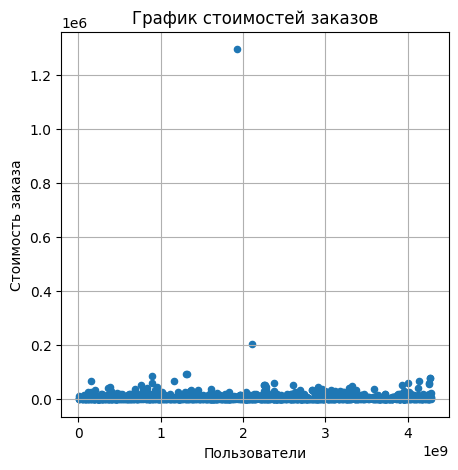

In [50]:
# Построим точечный график
orders.plot(x='visitorId', y='revenue', 
                    kind='scatter', 
                    grid=True, 
                    figsize=(5,5), 
                    title='График стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказа')

##### Комментарий
Из-за одной покупки, стоимостью выше 1 млн., график получился не очень информативным. Попробуем снова, установив границу на 100 тыс.

<AxesSubplot: title={'center': 'График стоимостей заказов'}, xlabel='visitorId', ylabel='revenue'>

Text(0.5, 0, 'Пользователи')

Text(0, 0.5, 'Стоимость заказа')

(0.0, 100000.0)

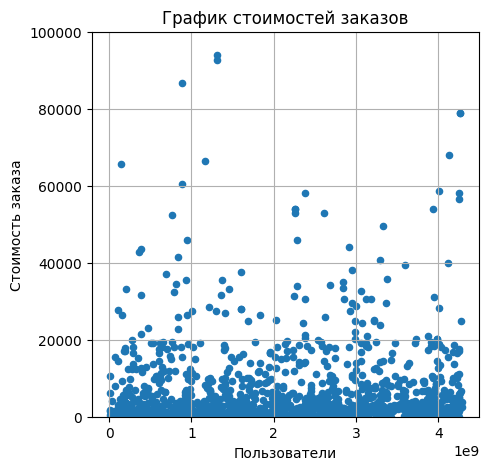

In [51]:
orders.plot(x='visitorId', y='revenue', 
                    kind='scatter', 
                    grid=True, 
                    figsize=(5,5), 
                    title='График стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказа')
plt.ylim(0, 100000)

##### Вывод
Теперь распределение стоимостей видно отчетливее. С уверенностью можно сказать, что подавляющее большинство стоимостей заказов не превышало 20000.

#### Перцентили стоимости заказов

In [52]:
price_percentile = np.percentile(orders['revenue'], [95, 99]) 
print('Всего заказов: {}'.format(len(orders)))
print()
print('95-й перцентиль: {:.0f}'.format(price_percentile[0]))
print('Заказов дороже 28000: {}'.format(
    orders.query('revenue > 28000')['revenue'].count()))
print()
print('99-й перцентиль: {:.0f}'.format(price_percentile[1]))
print('Заказов дороже 58233: {}'.format(
    orders.query('revenue > 58233')['revenue'].count()))

Всего заказов: 1197

95-й перцентиль: 28000
Заказов дороже 28000: 60

99-й перцентиль: 58233
Заказов дороже 58233: 12


##### Вывод
Всего 60 из 1197 заказов превышают стоимость в 28000. Границей для определения аномальных заказов выберем 95-й перцентиль.

#### Статистическая значимость различий в конверсии между группами по «сырым» данным

In [53]:
# Посчитаем количество заказов на каждого пользователя по группам
ordersByUsersA = orders.query(
    'group == "A"').groupby(
    'visitorId').agg({
    'transactionId': 'count'}).reset_index()
ordersByUsersA.columns = ['id', 'orders']

ordersByUsersB = orders.query(
    'group == "B"').groupby(
    'visitorId').agg({
    'transactionId': 'count'}).reset_index()
ordersByUsersB.columns = ['id', 'orders']

In [54]:
ordersByUsersA['id'].count() + ordersByUsersB['id'].count()

1089

##### Комментарий
При группировке по пользователям, с разбивкой на группы А и В получилось 1089 пользователей, а как мы могли заметить ранее, при группировке для формирования точечного графика без разъединения на группы, пользователей было 1031.

In [55]:
visitorsB = pd.Series(ordersByUsersB['id'])
ordersByUsersA.query('id in @visitorsB')['id'].count()

58

##### Комментарий
Проверка на совпадение id в группах показала, что 58 пользователей с одинаковыми id совершали покупки в обеих группах. Данный факт может негативно отразиться на результатах исследования, поэтому сообщим об этом дата-инжинерам, руководству или заказчику. Пока ответ не получен и неизвестно какие действия предпринимать, продолжим проводить исследование с имеющимися данными.

In [56]:
# Создадим таблицы с количеством строк равным количеству всех посетителей и заказов своершенных за это время
sampleA = pd.concat(
    [ordersByUsersA['orders'], pd.Series(
        0, index=np.arange(mergedAB['visitorsA'].max() - len(ordersByUsersA['orders'])))],axis=0)

sampleB = pd.concat(
    [ordersByUsersB['orders'], pd.Series(
        0, index=np.arange(mergedAB['visitorsB'].max() - len(ordersByUsersB['orders'])))],axis=0)

In [57]:
#  Посчитаем статистическую значимость различия конверсий групп, применив тест Манна-Уитни
print('P-value: {:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Разница конверсий групп: {:.3f}'.format(sampleB.mean() / sampleA.mean()-1))

P-value: 0.017
Разница конверсий групп: 0.138


##### Вывод
P-value меньше 0.05, в связи с чем отвергаем нулевую гипотезу. Исходя из анализа "сырых данных" в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы B к конверсии группы A равен 13.8%.

#### Статистическая значимость различий в среднем чеке между группами по «сырым» данным

In [58]:
ordersA = orders.query('group == "A"')
ordersB = orders.query('group == "B"')

In [59]:
print('P-value: {:.3f}'.format(stats.mannwhitneyu(ordersA['revenue'], ordersB['revenue'])[1]))
print('Разница среднего чека групп: {:.3f}'.format(ordersB['revenue'].mean() / ordersA['revenue'].mean()-1))

P-value: 0.729
Разница среднего чека групп: 0.259


##### Вывод
P-value больше 0.05 — статистически значимых различий в среднем чеке между группами нет. Однако относительное различие среднего чека между группами составляет 25.9%. Крайне подозрительный результат.

#### Статистическая значимость различий в конверсии между группами по «очищенным» данным

In [60]:
# Пользователи соврешившие больше 2-х заказов
usersWithManyOrders = pd.concat(
    [ordersByUsersA.query('orders > 2')['id'], ordersByUsersB.query('orders > 2')['id']], axis=0)

# Пользователи соврешившие покупки дороже 28000
usersWithExpensiveOrders = orders.query('revenue > 28000')['visitorId']

# Соеденим полученные данные
abnormalUsers = pd.concat(
    [usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()

In [61]:
# Получим аналогичные таблицы, отфильтрованные от аномальных пользователей
cleared_sampleA = pd.concat(
    [ordersByUsersA.query('id not in @abnormalUsers')['orders'], pd.Series(
        0, index=np.arange(mergedAB['visitorsA'].max() - len(ordersByUsersA['orders'])))],axis=0)

cleared_sampleB = pd.concat(
    [ordersByUsersB.query('id not in @abnormalUsers')['orders'], pd.Series(
        0, index=np.arange(mergedAB['visitorsB'].max() - len(ordersByUsersB['orders'])))],axis=0)

In [62]:
#  Посчитаем статистическую значимость различия конверсий групп, применив тест Манна-Уитни
print('P-value: {:.3f}'.format(stats.mannwhitneyu(cleared_sampleA, cleared_sampleB)[1]))
print('Разница конверсий групп: {:.3f}'.format(cleared_sampleB.mean() / cleared_sampleA.mean()-1))

P-value: 0.013
Разница конверсий групп: 0.173


##### Вывод
P-value меньше 0.05 - отвергаем нулевую гипотезу. Исходя из анализа "очищенных данных" в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы B к конверсии группы A увеличился по сравнению с предыдущим результатом "сырых данных" и составил 17.3%.

#### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [63]:
cleared_ordersA = orders.query('group == "A" and visitorId not in @abnormalUsers')
cleared_ordersB = orders.query('group == "B" and visitorId not in @abnormalUsers')

In [64]:
print('P-value: {:.3f}'.format(stats.mannwhitneyu(cleared_ordersA['revenue'], cleared_ordersB['revenue'])[1]))
print('Разница среднего чека групп: {:.3f}'.format(
    cleared_ordersB['revenue'].mean() / cleared_ordersA['revenue'].mean()-1))

P-value: 0.738
Разница среднего чека групп: -0.020


##### Вывод
P-value почти не изменился и остался так же больше 0.05 — статистически значимых различий в среднем чеке между группами по "очищенным данным" нет. Относительное различие средних чеков значительно изменилось - от прироста в 25.9% по "сырым" данным к убытку в 2% по "очищенным". По всей видимости та самая покупка стоимостью выше 1200000 была совершена клиентом из группы В.

## Общий вывод и рекомендации бизнесу

Анализ А/В - теста позволяет нам сделать следующие выводы:
  - С учетом аномалий:
   - в конверсиях групп есть статистически значимые различия. Относительный прирост конверсии группы B к конверсии группы A равен 13.8%.
   - статистически значимые различия в среднем чеке между группами отсутствуют. Средний покупательский чек группы В выше, чем у группы А на 25.9%.
 
 
  - Без учета аномалий:
   - в конверсиях групп есть статистически значимые различия. Относительный прирост конверсии группы B к конверсии группы A составляет 17.3%.
   - статистически значимые различия в среднем чеке между группами отсутствуют. Средний покупательский чек группы В ниже, чем у группы А на 2%.
   
Основываясь на полученных результатах, учитывая, что при почти одинаковом количестве пользователей, в группе В совершается больше заказов, чем в группе А, можно сказать о позитивном результате проведения теста и увеличении конверсии в группе В. По данным, не отфильтрованным от аномальных покупок, можно так же со всей смелостью заявить о победе группы В, чьи показатели на четверть выше группы А, однако убрав аномально дорогие покупки, выручки групп теряют значительные отличия, а группа В уже проигрывает на 2% в данном показателе.

Для ответа на вопрос о дальнейшей судьбе А/В-теста нам необходимо знать какую гипотезу он проверял и на какие результаты рассчитывал заказчик. Если целью теста было установить увеличение конверсии, то его можно считать успешным, признать победу группы В и завершить. Если же главным ожиданием от теста было увеличение выручки, то необходимо продолжить тест, так как показатели "сырых" и "очищенных" данных сильно разнятся, возможно через какое-то время аномально дорогие покупки, совершенные в группе В, перестанут быть исключением и станут рядовым событием. 